In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import problema2.src.preprocessing as prepro
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

war_class_dev : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema2/data/raw/WAR_class_dev.csv')
war_class_test : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema2/data/raw/WAR_class_test.csv')

In [2]:
war_class_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   float64
 1   mp            6782 non-null   float64
 2   raptor_total  6782 non-null   float64
 3   war_total     6782 non-null   float64
 4   pace_impact   6782 non-null   float64
 5   war_class     6782 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 318.0 KB


In [3]:
war_class_dev_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    war_class_dev, 
    filename='war_class_dev', 
    save_path=f'{project_root}/TP02/problema2/data/processed/'
)
war_class_dev_processed_and_standardized.info()
display(war_class_dev_processed_and_standardized.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   Float64
 1   mp            6782 non-null   Float64
 2   raptor_total  6782 non-null   Float64
 3   war_total     6782 non-null   Float64
 4   pace_impact   6782 non-null   Float64
 5   war_class_1   6782 non-null   bool   
 6   war_class_2   6782 non-null   bool   
 7   war_class_3   6782 non-null   bool   
dtypes: Float64(5), bool(3)
memory usage: 318.0 KB


,poss,mp,raptor_total,war_total,pace_impact,war_class_1,war_class_2,war_class_3
0,-0.696597,-1.005259,-0.403848,-0.530555,0.585699,False,True,False
1,-1.235442,-1.262282,-0.836539,-0.646773,2.269038,False,True,False
2,0.769691,0.5551,1.835655,1.701718,-0.961291,False,False,True
3,1.908678,1.848081,1.503215,2.283932,-1.231505,False,False,True
4,2.343119,1.941052,1.408249,2.509316,-1.214635,False,False,True


In [4]:
class_1_values : dict[bool, int] = {
    False : war_class_dev_processed_and_standardized['war_class_1'].value_counts()[False], 
    True : war_class_dev_processed_and_standardized['war_class_1'].value_counts()[True],
}
class_2_values : dict[bool, int] = {
    False : war_class_dev_processed_and_standardized['war_class_2'].value_counts()[False], 
    True : war_class_dev_processed_and_standardized['war_class_2'].value_counts()[True],
}
class_3_values : dict[bool, int] = {
    False : war_class_dev_processed_and_standardized['war_class_3'].value_counts()[False], 
    True : war_class_dev_processed_and_standardized['war_class_3'].value_counts()[True],
}
class_proportion_table : pd.DataFrame = pd.DataFrame(columns=["Class 1", "Class 2", "Class 3"])
class_proportion_table.loc['Proporción'] = [
    class_1_values[False] / class_1_values[True], 
    class_2_values[False] / class_2_values[True], 
    class_3_values[False] / class_3_values[True],
]
display(class_proportion_table)
class_probability_table : pd.DataFrame = pd.DataFrame(columns=["Class 1", "Class 2", "Class 3"])
class_probability_table.loc['Probabilidad'] = [
    class_1_values[True] / (class_1_values[True] + class_1_values[False]), 
    class_2_values[True] / (class_2_values[True] + class_2_values[False]), 
    class_3_values[True] / (class_3_values[True] + class_3_values[False]),
]
display(class_probability_table)
print("")
print("Esperanza de la probabilidad de pertenecer a cada clase: ", class_probability_table.loc['Probabilidad'].mean())
print("")
print("Podemos observar que las clases están bien balanceadas.")

,Class 1,Class 2,Class 3
Proporción,2.342533,1.703069,2.022282


,Class 1,Class 2,Class 3
Probabilidad,0.299174,0.36995,0.330876



Esperanza de la probabilidad de pertenecer a cada clase:  0.3333333333333333

Podemos observar que las clases están bien balanceadas.


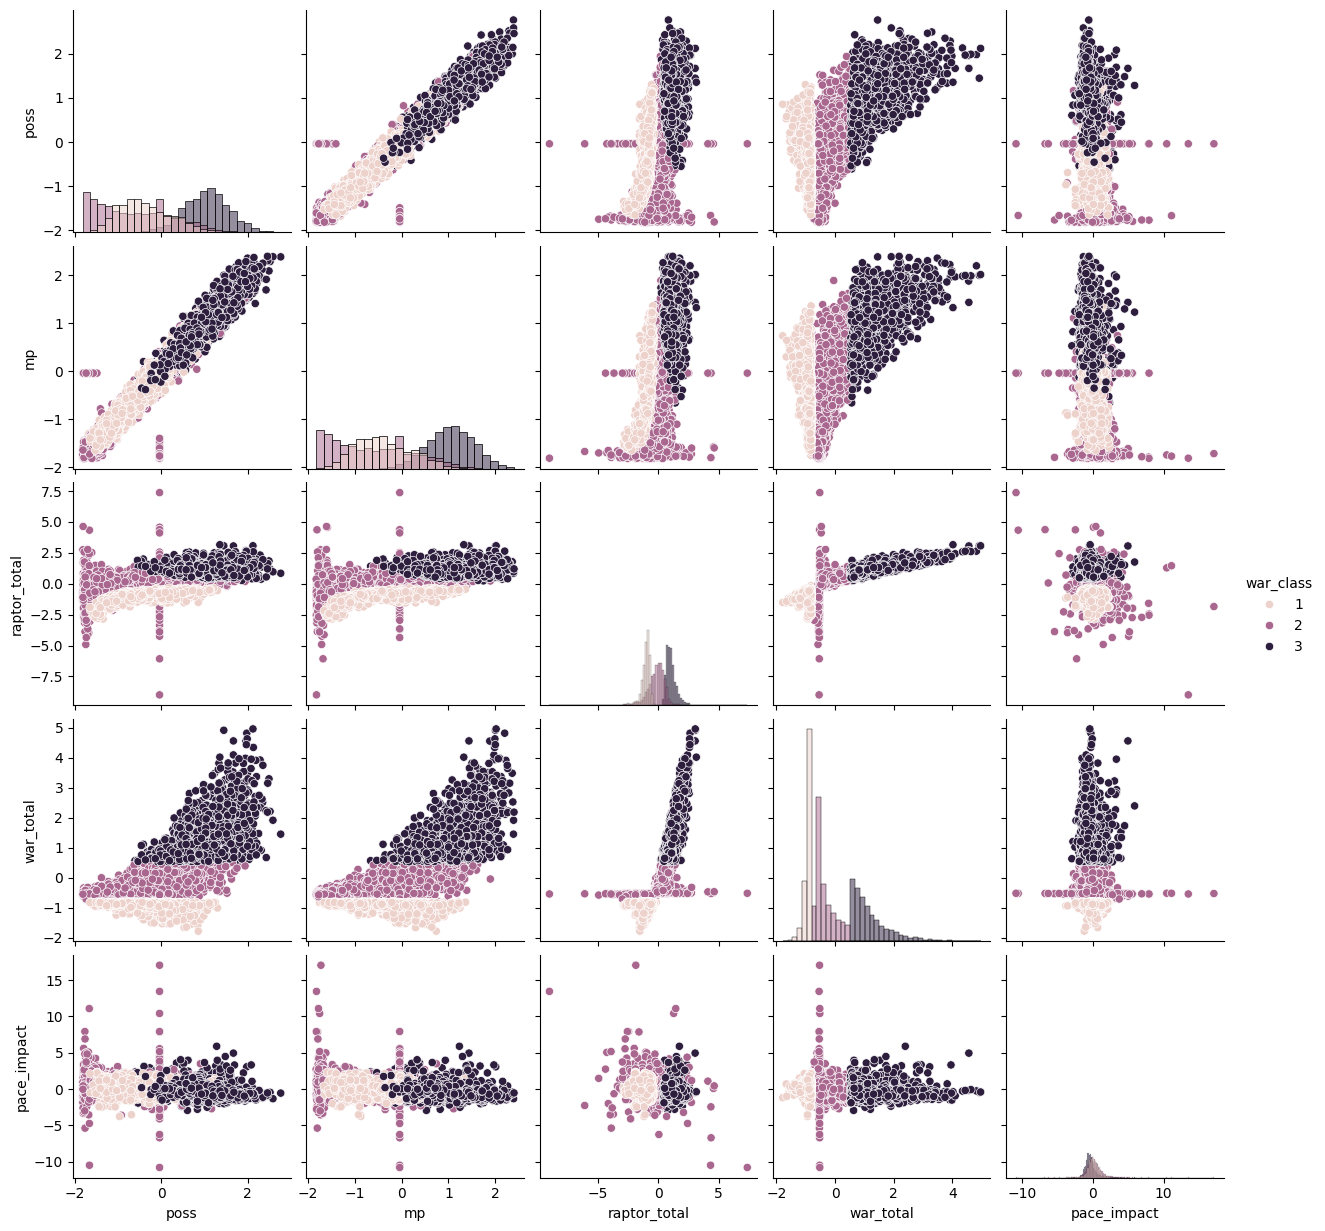

In [5]:
_df : pd.DataFrame = war_class_dev_processed_and_standardized.copy()
_df['war_class'] = _df[['war_class_1', 'war_class_2', 'war_class_3']].idxmax(axis=1)
_df['war_class'] = _df['war_class'].map({'war_class_1': 1, 'war_class_2': 2, 'war_class_3': 3})
sb.pairplot(_df.drop(columns=['war_class_1', 'war_class_2', 'war_class_3']), hue='war_class', diag_kind='hist', corner=False)
plt.show()

In [6]:
# Se observa una correlación lineal entre las features 'mp' y 'poss', como también una menor correlación en las features 'raptor_total' y 'war_total'
# Esto se observa más claramente en el siguiente gráfico

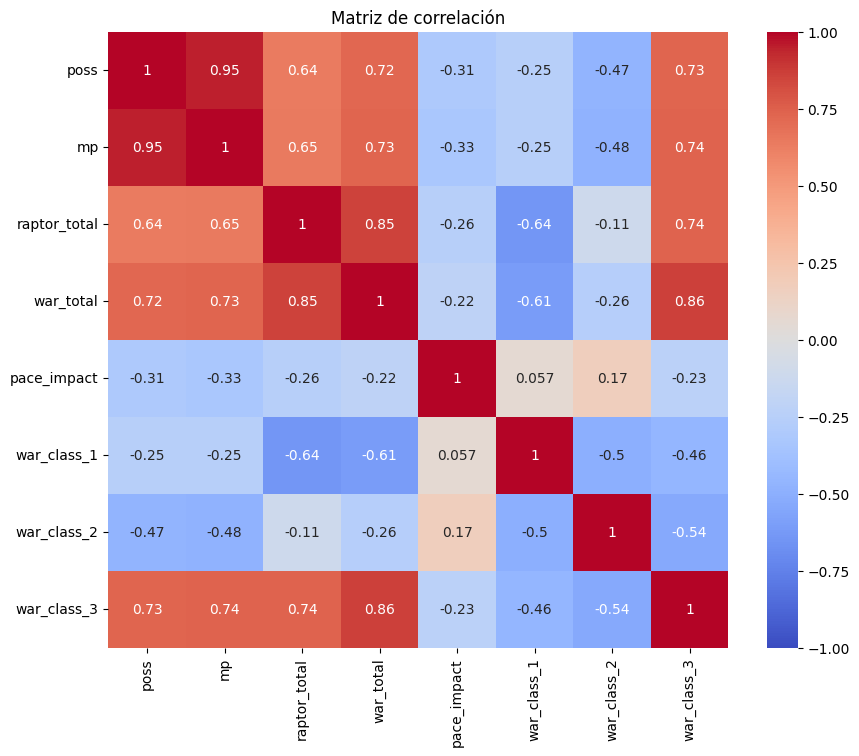

In [7]:
plt.figure(figsize=(10, 8))
sb.heatmap(war_class_dev_processed_and_standardized.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Tanto 'poss', como 'mp' proporcionan el mismo nivel de información. Por lo que es posible descartar alguna de las dos feautures.
display(war_class_dev_processed_and_standardized.head())
war_class_dev_processed_and_standardized = war_class_dev_processed_and_standardized.drop(columns=['poss'])
display(war_class_dev_processed_and_standardized.head())

,poss,mp,raptor_total,war_total,pace_impact,war_class_1,war_class_2,war_class_3
0,-0.696597,-1.005259,-0.403848,-0.530555,0.585699,False,True,False
1,-1.235442,-1.262282,-0.836539,-0.646773,2.269038,False,True,False
2,0.769691,0.5551,1.835655,1.701718,-0.961291,False,False,True
3,1.908678,1.848081,1.503215,2.283932,-1.231505,False,False,True
4,2.343119,1.941052,1.408249,2.509316,-1.214635,False,False,True


,mp,raptor_total,war_total,pace_impact,war_class_1,war_class_2,war_class_3
0,-1.005259,-0.403848,-0.530555,0.585699,False,True,False
1,-1.262282,-0.836539,-0.646773,2.269038,False,True,False
2,0.5551,1.835655,1.701718,-0.961291,False,False,True
3,1.848081,1.503215,2.283932,-1.231505,False,False,True
4,1.941052,1.408249,2.509316,-1.214635,False,False,True
